In [ ]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Muat dataset
data = pd.read_csv('insurance.csv')

In [ ]:
# Encode variabel kategorikal menggunakan one-hot encoding
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

# Tentukan fitur (X) dan target (y)
X = data_encoded[['age']]  # Fitur (selain target)
y = data_encoded['charges']                # Target (biaya medis)

# Bagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8 , test_size=0.2, random_state=42)

# Opsional: lakukan feature scaling untuk standar regresi yang lebih baik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Buat dan latih model Multiple Linear Regression
mlr = LinearRegression()
mlr.fit(X_train_scaled, y_train)

# Prediksi menggunakan data uji
y_pred = mlr.predict(X_test_scaled)

In [ ]:
# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Cetak hasil evaluasi
print(f'R-squared: {r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


R-squared: 0.12408973539501944
Mean Squared Error (MSE): 135983957.4805469
Mean Absolute Error (MAE): 9173.258196746589


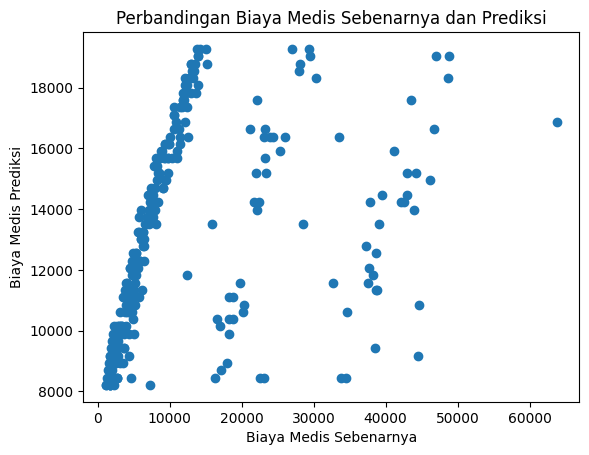

In [ ]:
# Visualisasi actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Biaya Medis Sebenarnya')
plt.ylabel('Biaya Medis Prediksi')
plt.title('Perbandingan Biaya Medis Sebenarnya dan Prediksi')
plt.show()